In [13]:
import os
import struct
import numpy as np
import glob
import matplotlib.pyplot as plt

def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte'
                               % kind)
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II',
                                 lbpath.read(8))
        labels = np.fromfile(lbpath,
                             dtype=np.int8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII',
                                               imgpath.read(16))
        images = np.fromfile(imgpath,
                             dtype=np.int8).reshape(len(labels), 784)

    return images, labels
x_train, y_train = load_mnist('','train')


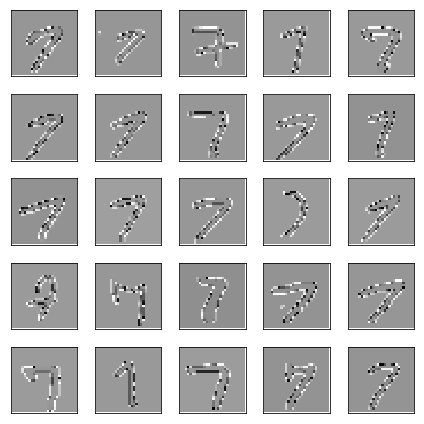

In [21]:
fig, ax = plt.subplots(
    nrows=5,
    ncols=5,
    sharex=True,
    sharey=True,figsize=(6,6))
ax = ax.flatten()
for i in range(25):
    img = x_train[y_train == 7][i].reshape(28, 28)
    ax[i].imshow(img,cmap='Greys')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [15]:
def filterfun(x,y):
    x_f = x[np.logical_or(y==4, y==9)]
    y_f = y[np.logical_or(y==4, y==9)]
    y_f[y_f==4]=-1
    y_f[y_f==9]=1
    return x_f,y_f
x_train_f, y_train_f = filterfun(x_train,y_train)
x_train_f

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

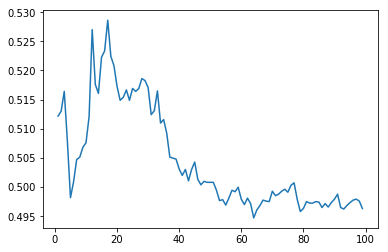

In [16]:
def perceptron(X,y,I):
    w = np.zeros(X.shape[1])
    for t in range(I):
        exist = False
        for i in range(X.shape[0]):
            if(X[i].dot(w) * y[i]<=0):
                w += X[i]*y[i]
                exist = True
                break
        if(not exist):
            print(exist)
            break
    return w
I = 100
accuracy = np.zeros(I)
for i in range(I):
    w = perceptron(x_train_f,y_train_f,i)
    accuracy[i] = sum(x_train_f.dot(w)*(y_train_f)>0)/len(y_train_f)
    
plt.plot(np.arange(1,I),accuracy[1:])
pass

In [17]:
w = perceptron(x_train_f,y_train_f,100)

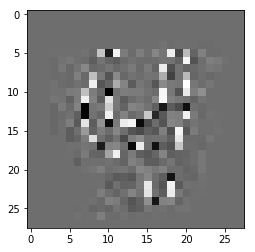

In [22]:
plt.imshow(w.reshape((28,28)),cmap='Greys')
plt.show()

In [ ]:
x_test, y_test = load_mnist('','t10k')
x_test_f, y_test_f = filterfun(x_test,y_test)
I=100
accuracy = np.zeros(I)
for i in range(I):
    w = perceptron(x_train_f,y_train_f,i)
    accuracy[i] = sum(x_test_f.dot(w)*(y_test_f)>0)/len(y_test_f)
    
plt.plot(np.arange(1,I),accuracy[1:])
plt.show()